In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import numpy as np

%config InlineBackend.figure_format = 'retina'

In [2]:
# Accessing all data files for teleportation

# Establishing the path for each file
folder = '../../entanglement/'
path_ent_noise = folder + 'entanglement_results_noise.txt'
path_ent_sim = folder + 'entanglement_results_simulator.txt'

# Storing all data as local variables
noise = pd.read_csv(path_ent_noise, sep=',', dtype=str)
simulator = pd.read_csv(path_ent_sim, sep=',', dtype=str)

In [3]:
data_simulator = simulator
data_noise = noise

In [4]:
data_noise

,Qubits,Beta State,Success,Measurement,Frequency
0,2,00,False,01,1119
1,2,00,False,10,1219
2,2,00,False,00,3767
3,2,00,False,11,3895
4,2,10,False,01,1168
...,...,...,...,...,...
11704,14,11,False,10101010000000,1
11705,14,11,False,10110110000001,1
11706,14,11,False,11001010010000,1
11707,14,11,False,00000001111100,33


In [7]:
def calculate_error_rate(qubits=None, beta_state=None, simulator=data_simulator, noise=data_noise):
    # Apply filters based on the function parameters
    simulator_filter = (True if qubits is None else simulator['Qubits'] == qubits) & \
                       (True if beta_state is None else simulator['Beta State'] == beta_state)
    
    noise_filter = (True if qubits is None else noise['Qubits'] == qubits) & \
                   (True if beta_state is None else noise['Beta State'] == beta_state)
    
    sim_data = simulator[simulator_filter]
    noi_data = noise[noise_filter]

    simulator_measurements = set(sim_data['Measurement'])
    noise_measurements = set(noi_data['Measurement'])

    error_measurements = noise_measurements - simulator_measurements
    
    noi_data.loc[:, 'Frequency'] = noi_data['Frequency'].astype(int)
    error_frequency = noi_data[noi_data['Measurement'].isin(error_measurements)]['Frequency'].sum()
    total_noise_frequency = noi_data['Frequency'].sum()

    if total_noise_frequency > 0:
        error_rate = error_frequency / total_noise_frequency
    else:
        error_rate = 0  # Avoid division by zero

    return error_rate

In [16]:
qubits = [str(i) for i in range(2, 15)]
beta_states = ['00', '10', '01', '11']

error_data = []

# Loop through each combination of qubits, initial states, and beta states
for q in qubits:
    for beta in beta_states:
        error_rate = calculate_error_rate(q, beta)
        error_data.append({
            'Qubits': q,
            'Beta State': beta,
            'Error Rate': error_rate
            })

# Convert the list to a DataFrame
error_df = pd.DataFrame(error_data)

In [17]:
print(error_df)

   Qubits Beta State  Error Rate
0       2         00      0.2338
1       2         10      0.2376
2       2         01      0.2335
3       2         11      0.2411
4       3         00      0.2707
5       3         10      0.2660
6       3         01      0.2675
7       3         11      0.2647
8       4         00      0.3926
9       4         10      0.3915
10      4         01      0.3925
11      4         11      0.3943
12      5         00      0.4205
13      5         10      0.4247
14      5         01      0.4278
15      5         11      0.4229
16      6         00      0.4324
17      6         10      0.4307
18      6         01      0.4380
19      6         11      0.4432
20      7         00      0.4548
21      7         10      0.4489
22      7         01      0.4476
23      7         11      0.4530
24      8         00      0.4662
25      8         10      0.4631
26      8         01      0.4678
27      8         11      0.4517
28      9         00      0.4857
29      9 

In [18]:
# Calculate the average error rate for each number of qubits
error_rates_qubits = []
for q in qubits:
    qubit_data = error_df[error_df['Qubits'] == q]
    average_error = qubit_data['Error Rate'].mean()
    error_rates_qubits.append(average_error)

In [20]:
def plot_error_rates_qubits(error_rates, qubit_range, save_fig=False, figname=None):
    dpi = 400  # Set the resolution for the plot
    fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
    
    ax.plot(qubit_range, error_rates, marker='o', linestyle='-', color='tomato')

    # Adding title and labels
    ax.set_title('Error Rate as a Function of Qubits')
    ax.set_xlabel('Number of Qubits in Entangled State')
    ax.set_ylabel('Error Rate')
    ax.set_xticks(np.arange(len(qubit_range)))  # Ensure that all qubit counts are shown as ticks
    ax.set_xticklabels(qubit_range)

    # Display grid
    ax.grid(True)

    # Optionally save the figure in high resolution
    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')  # Can change format to 'pdf', 'svg', 'eps' for vector formats
        print(f"Wrote high-resolution figure to {figname}")

    # Show plot if not saving (or also show if desired)
    if not save_fig or (save_fig and figname is None):
        plt.show()
    
    # Return the figure object
    return fig

In [54]:
%%capture
Fig = plot_error_rates_qubits(
    error_rates_qubits,
    qubits,
    save_fig=True,
    figname='figures/error-rate-qubits.png')

In [22]:
# Calculate the average error rate for each beta state
error_rates_beta = []
for beta in beta_states:
    beta_data = error_df[error_df['Beta State'] == beta]
    average_error = beta_data['Error Rate'].mean()
    error_rates_beta.append(average_error)

In [23]:
def plot_error_rates_histogram(error_rates, labels, title, xlabel, ylabel='Error Rate', save_fig=False, figname=None):
    dpi = 400  # High resolution for the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=dpi)

    # Create the histogram
    bars = ax.bar(labels, error_rates, color='skyblue')

    # Adding title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(labels)))  # Set x-ticks to match the labels
    ax.set_xticklabels(labels)

    # Add value labels to the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

    # Optionally save the figure in high resolution
    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')
        print(f"Wrote high-resolution figure to {figname}")

    # Show plot if not saving (or also show if desired)
    if not save_fig or (save_fig and figname is None):
        plt.show()

    # Return the figure object
    return fig

In [55]:
%%capture

# Usage for Beta States
Fig = plot_error_rates_histogram(
    error_rates_beta, 
    beta_states, 
    title='Error Rate for Each Beta State', 
    xlabel='Beta State',
    save_fig=True,
    figname='figures/error-rate-beta-states.png'
)

In [25]:
# Initialize a dictionary to hold the error rates for each initial state
error_rates_by_beta_state = {beta: [] for beta in beta_states}

# Calculate the average error rate for each number of qubits for each initial state
for q in qubits:
    for beta in beta_states:
        # Filter data for the current number of qubits and initial state
        qubit_beta_data = error_df[(error_df['Qubits'] == q) & (error_df['Beta State'] == beta)]
        
        # Calculate the average error and append to the correct list in the dictionary
        average_error = qubit_beta_data['Error Rate'].mean()
        error_rates_by_beta_state[beta].append(average_error)

In [26]:
def plot_error_rates(error_rates_dict, qubit_range, title, legend_title, xlabel, ylabel='Error Rate', save_fig=False, figname=None):
    dpi = 400  # Set the resolution for the plot
    fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
    
    # Plot each set of error rates with a unique marker and color
    markers = ['o', 's', 'D', '^']  # Example markers
    colors = ['skyblue', 'tomato', 'forestgreen', 'gold']  # Example colors
    
    for (label, error_rates), marker, color in zip(error_rates_dict.items(), markers, colors):
        ax.plot(qubit_range, error_rates, marker=marker, linestyle='-', color=color, label=fr'{legend_title} $\left|{label}\right>$')
    
    # Adding title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(qubit_range)))  # Ensure that all qubit counts are shown as ticks
    ax.set_xticklabels(qubit_range)

    # Display grid
    ax.grid(True)
    
    # Add legend
    ax.legend(title=legend_title)

    # Optionally save the figure in high resolution
    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')  # Can change format to 'pdf', 'svg', 'eps' for vector formats
        print(f"Wrote high-resolution figure to {figname}")

    # Show plot if not saving (or also show if desired)
    if not save_fig or (save_fig and figname is None):
        plt.show()
    
    # Return the figure object
    return fig

In [57]:
%%capture

# Example usage for beta states
Fig = plot_error_rates(
    error_rates_dict=error_rates_by_beta_state, 
    qubit_range=qubits, 
    title='Error Rate as a Function of Qubits for Different Beta States',
    xlabel='Number of Qubits in Entangled State',
    legend_title='Beta State',
    save_fig=True,
    figname='figures/error-rates-qubits-beta-states.png'
)

In [35]:
def plot_histogram(counts, labels, title, xlabel='Measurement Outcome', ylabel='Counts', error_rate=None, save_fig=False, figname=None):
    dpi = 400  # High resolution for the plot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=dpi)

    # Create the histogram
    bars = ax.bar(labels, counts, color='skyblue')

    # Adding title and labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(range(len(labels)))  # Set x-ticks to match the labels
    ax.set_xticklabels(labels, rotation=45)

    # Add value labels to the bars
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')

    # Display grid
    # ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add a text box with the error rate
    if error_rate is not None:
        error_text = f'Error rate: {error_rate:.4f}'
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(0.05, 0.95, error_text, transform=ax.transAxes, fontsize=12,
                verticalalignment='top', bbox=props)

    # Optionally save the figure in high resolution
    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')
        print(f"Wrote high-resolution figure to {figname}")

    # Show plot if not saving (or also show if desired)
    if not save_fig or (save_fig and figname is None):
        plt.show()

    # Return the figure object
    return fig

In [72]:
bell_noise = data_noise[(data_noise['Qubits'] == '2') & (data_noise['Beta State'] == '00')]
bell_sim = data_simulator[(data_simulator['Qubits'] == '9') & (data_simulator['Beta State'] == '10')]

In [73]:
bell_sim_labels = bell_sim['Measurement'].tolist()
bell_sim_counts = bell_sim['Frequency'].astype(int).tolist()  # Convert to int for numerical operations

bell_noise_labels = bell_noise['Measurement'].tolist()
bell_noise_counts = bell_noise['Frequency'].astype(int).tolist()  # Convert to int for numerical operations

bell_noise_errors = sum(n for n in bell_noise_counts if n<1500)
bell_noise_total = sum(bell_noise_counts)
bell_noise_error_rate = bell_noise_errors / bell_noise_total if bell_noise_total > 0 else 0  # Checking to prevent division by zero

Wrote high-resolution figure to figures/simulator-9qubits-beta10.png


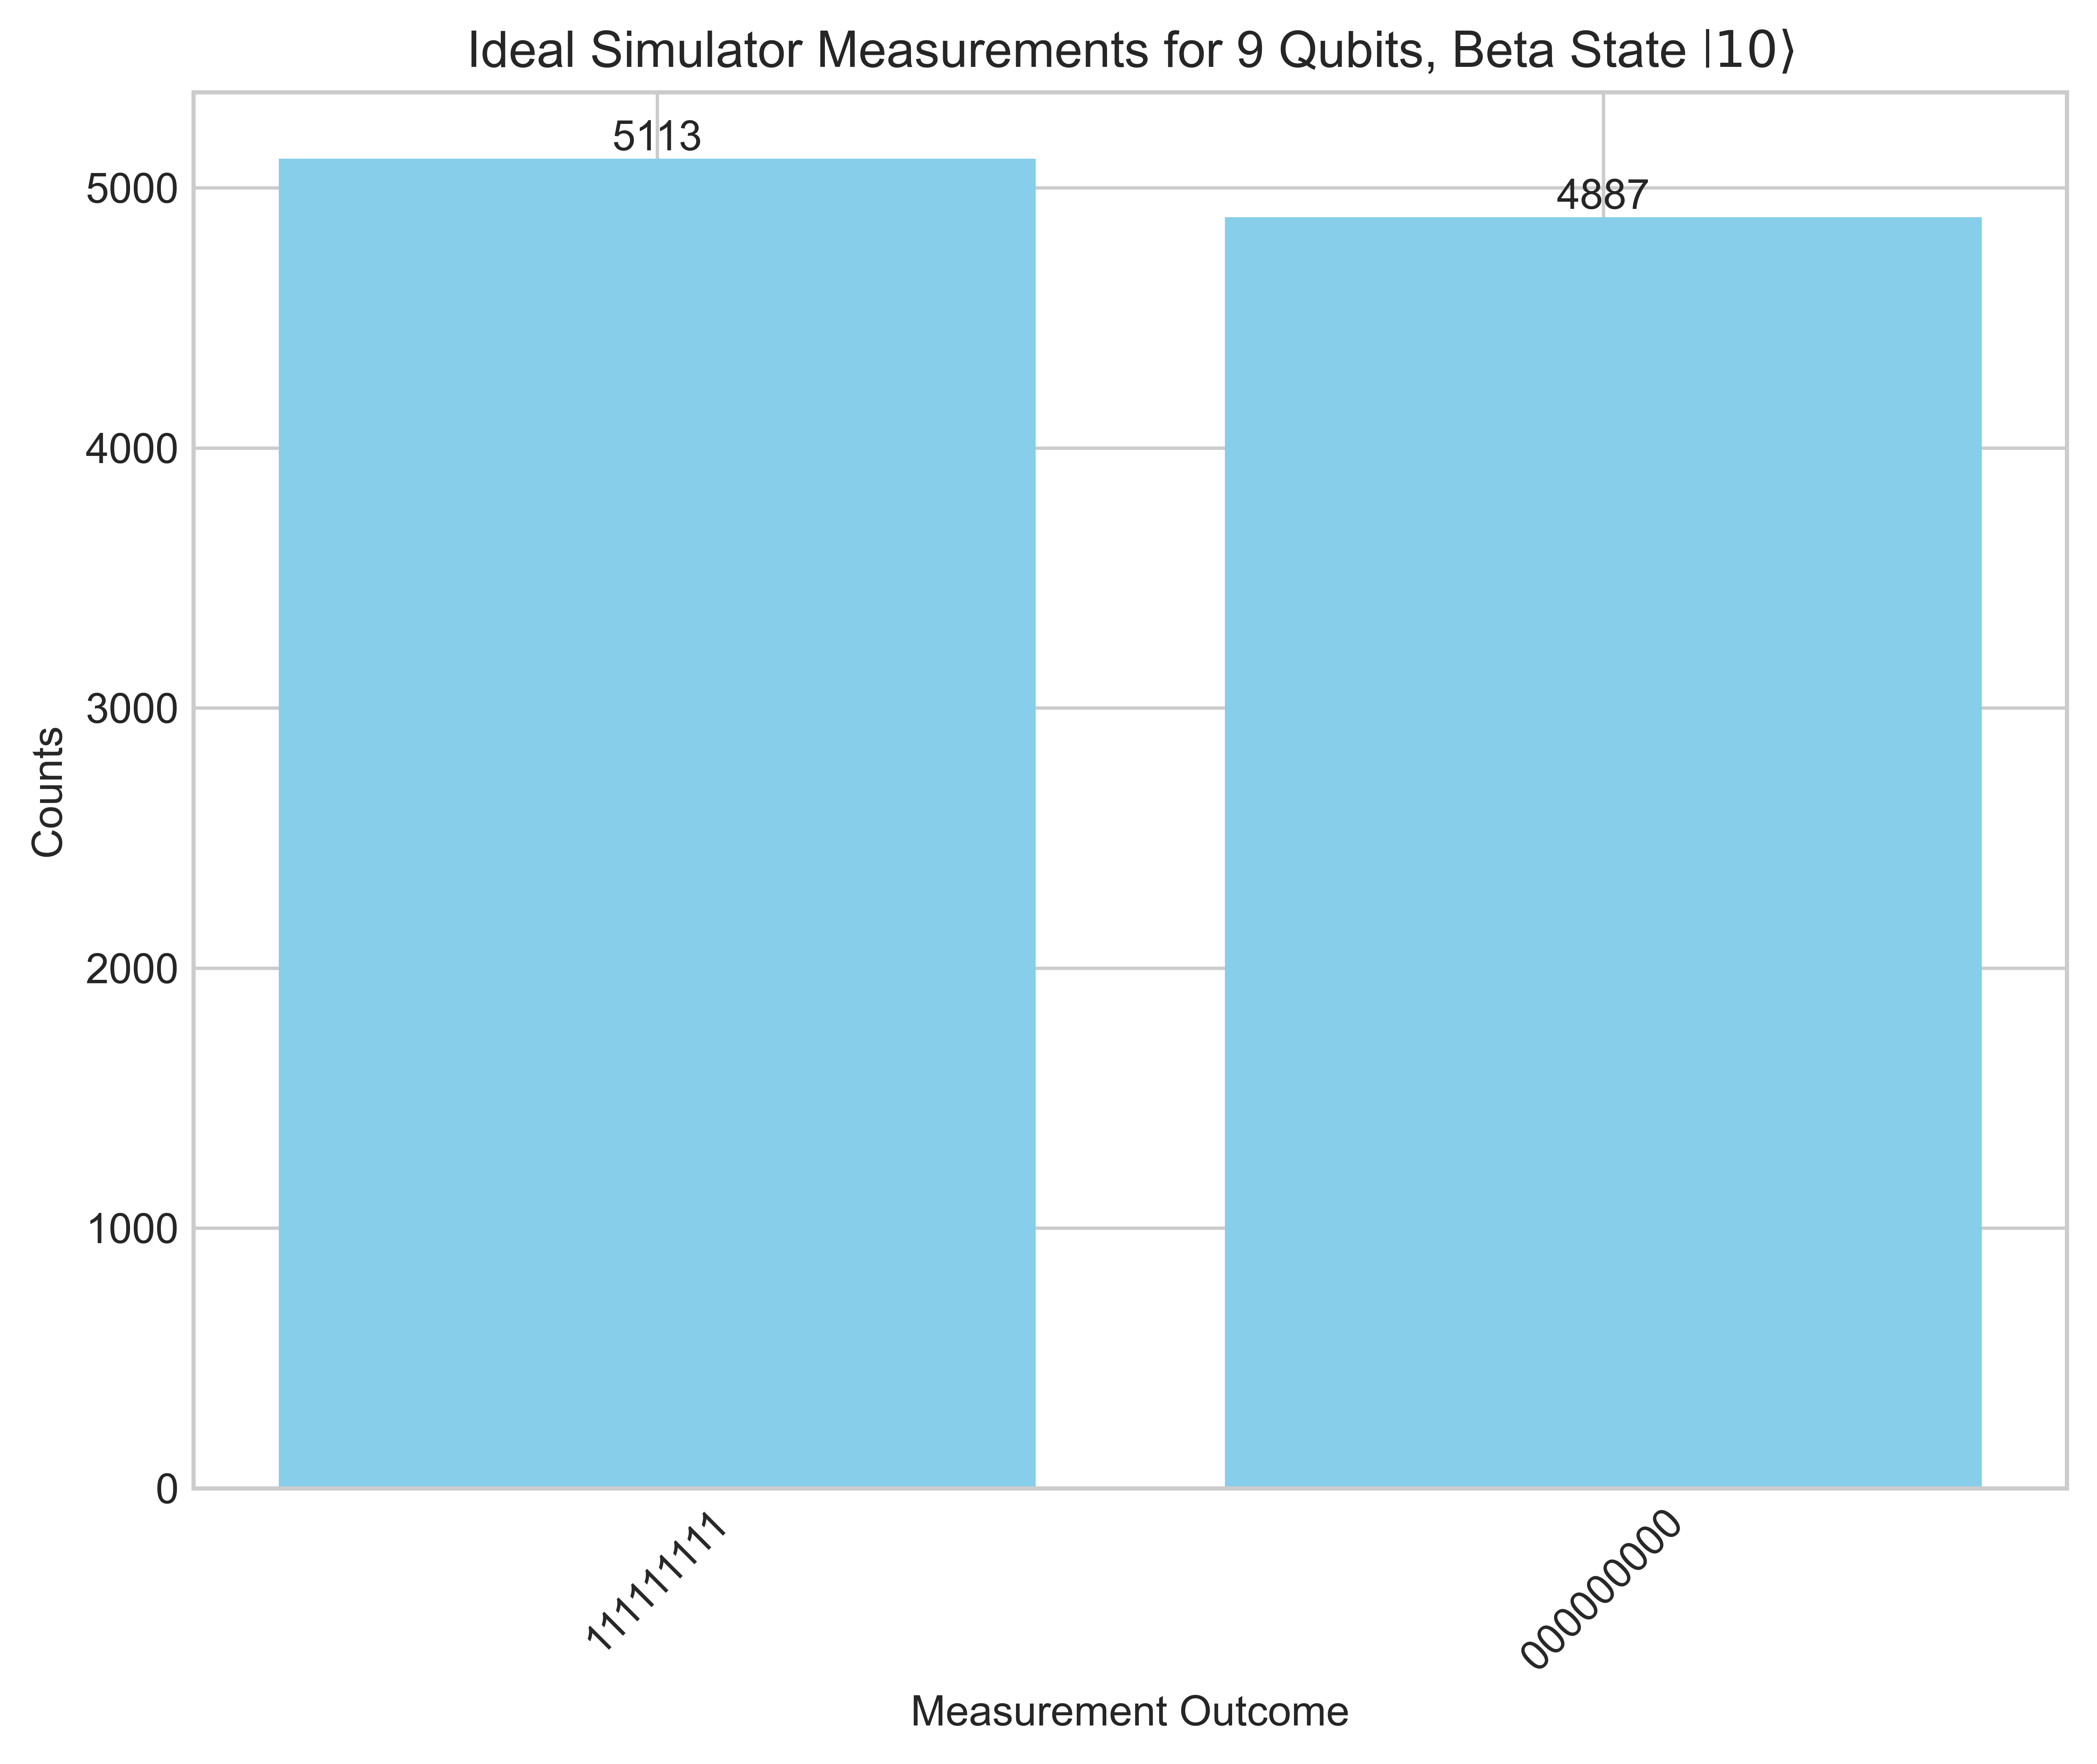

In [75]:
Fig = plot_histogram(
    bell_sim_counts,
    bell_sim_labels,
    title=r'Ideal Simulator Measurements for 9 Qubits, Beta State $\left|10\right>$',
    save_fig=True,
    figname='figures/simulator-9qubits-beta10.png'
)

In [69]:
# Function to add labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.0f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

def simulator_computer_comparison(ghz_labels, ghz_counts, ghz_sim_labels, ghz_sim_counts, qubits, beta_state,
                   error_rate_sim=None, save_fig=False, figname=None):
    dpi = 400

    # Create dataframes from the input data
    df_ghz = pd.DataFrame({
        'Measurement Result': ghz_labels,
        'Frequency': ghz_counts
    })

    df_ghz_sim = pd.DataFrame({
        'Measurement Result': ghz_sim_labels,
        'Frequency': ghz_sim_counts
    })

    # Merge the datasets on 'Measurement Result' with an outer join to include all unique labels
    merged_data = pd.merge(df_ghz, df_ghz_sim, on='Measurement Result', how='outer', suffixes=('_ghz', '_sim'))

    # Replace NaN values with 0 to ensure all bars can be plotted
    merged_data.fillna(0, inplace=True)

    # Sort the merged data to have a consistent order for x-ticks
    merged_data.sort_values('Measurement Result', inplace=True)

    # Create the figure with a higher resolution
    fig, ax = plt.subplots(figsize=(12, 6), dpi=dpi)

    # Width of the bars
    bar_width = 0.35

    # Generate index for the x-axis
    index = np.arange(len(merged_data['Measurement Result']))

    # Create the bar plots
    bars_ghz = ax.bar(index - bar_width/2, merged_data['Frequency_ghz'], bar_width, color='skyblue', label='Ideal Simulator')
    bars_sim = ax.bar(index + bar_width/2, merged_data['Frequency_sim'], bar_width, color='tomato', label='Noisy Simulator')

    # Add labels, title, and ticks
    ax.set_xlabel('Measurement Outcome')
    ax.set_ylabel('Counts')
    ax.set_title(fr'Ideal Simulator vs. Noisy Simulator: Measurements for {qubits} Qubits, Beta State $\left|{beta_state}\right>$')
    ax.set_xticks(index)
    ax.set_xticklabels(merged_data['Measurement Result'].astype(str), rotation=45)

    add_value_labels(bars_sim)
    add_value_labels(bars_ghz)

    if error_rate_sim is not None:
        error_text_sim = f'Noisy Simulator Error rate: {error_rate_sim:.4f}'
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        ax.text(0.05, 0.82, error_text_sim, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=props)

    # Add a legend
    ax.legend()

    # Optionally save the figure in high resolution
    if save_fig and figname:
        fig.savefig(figname, dpi=dpi, format='png')
        print(f"Wrote figure to {figname}")

    plt.show()
    return fig

Wrote figure to figures/ideal-vs-noise.png


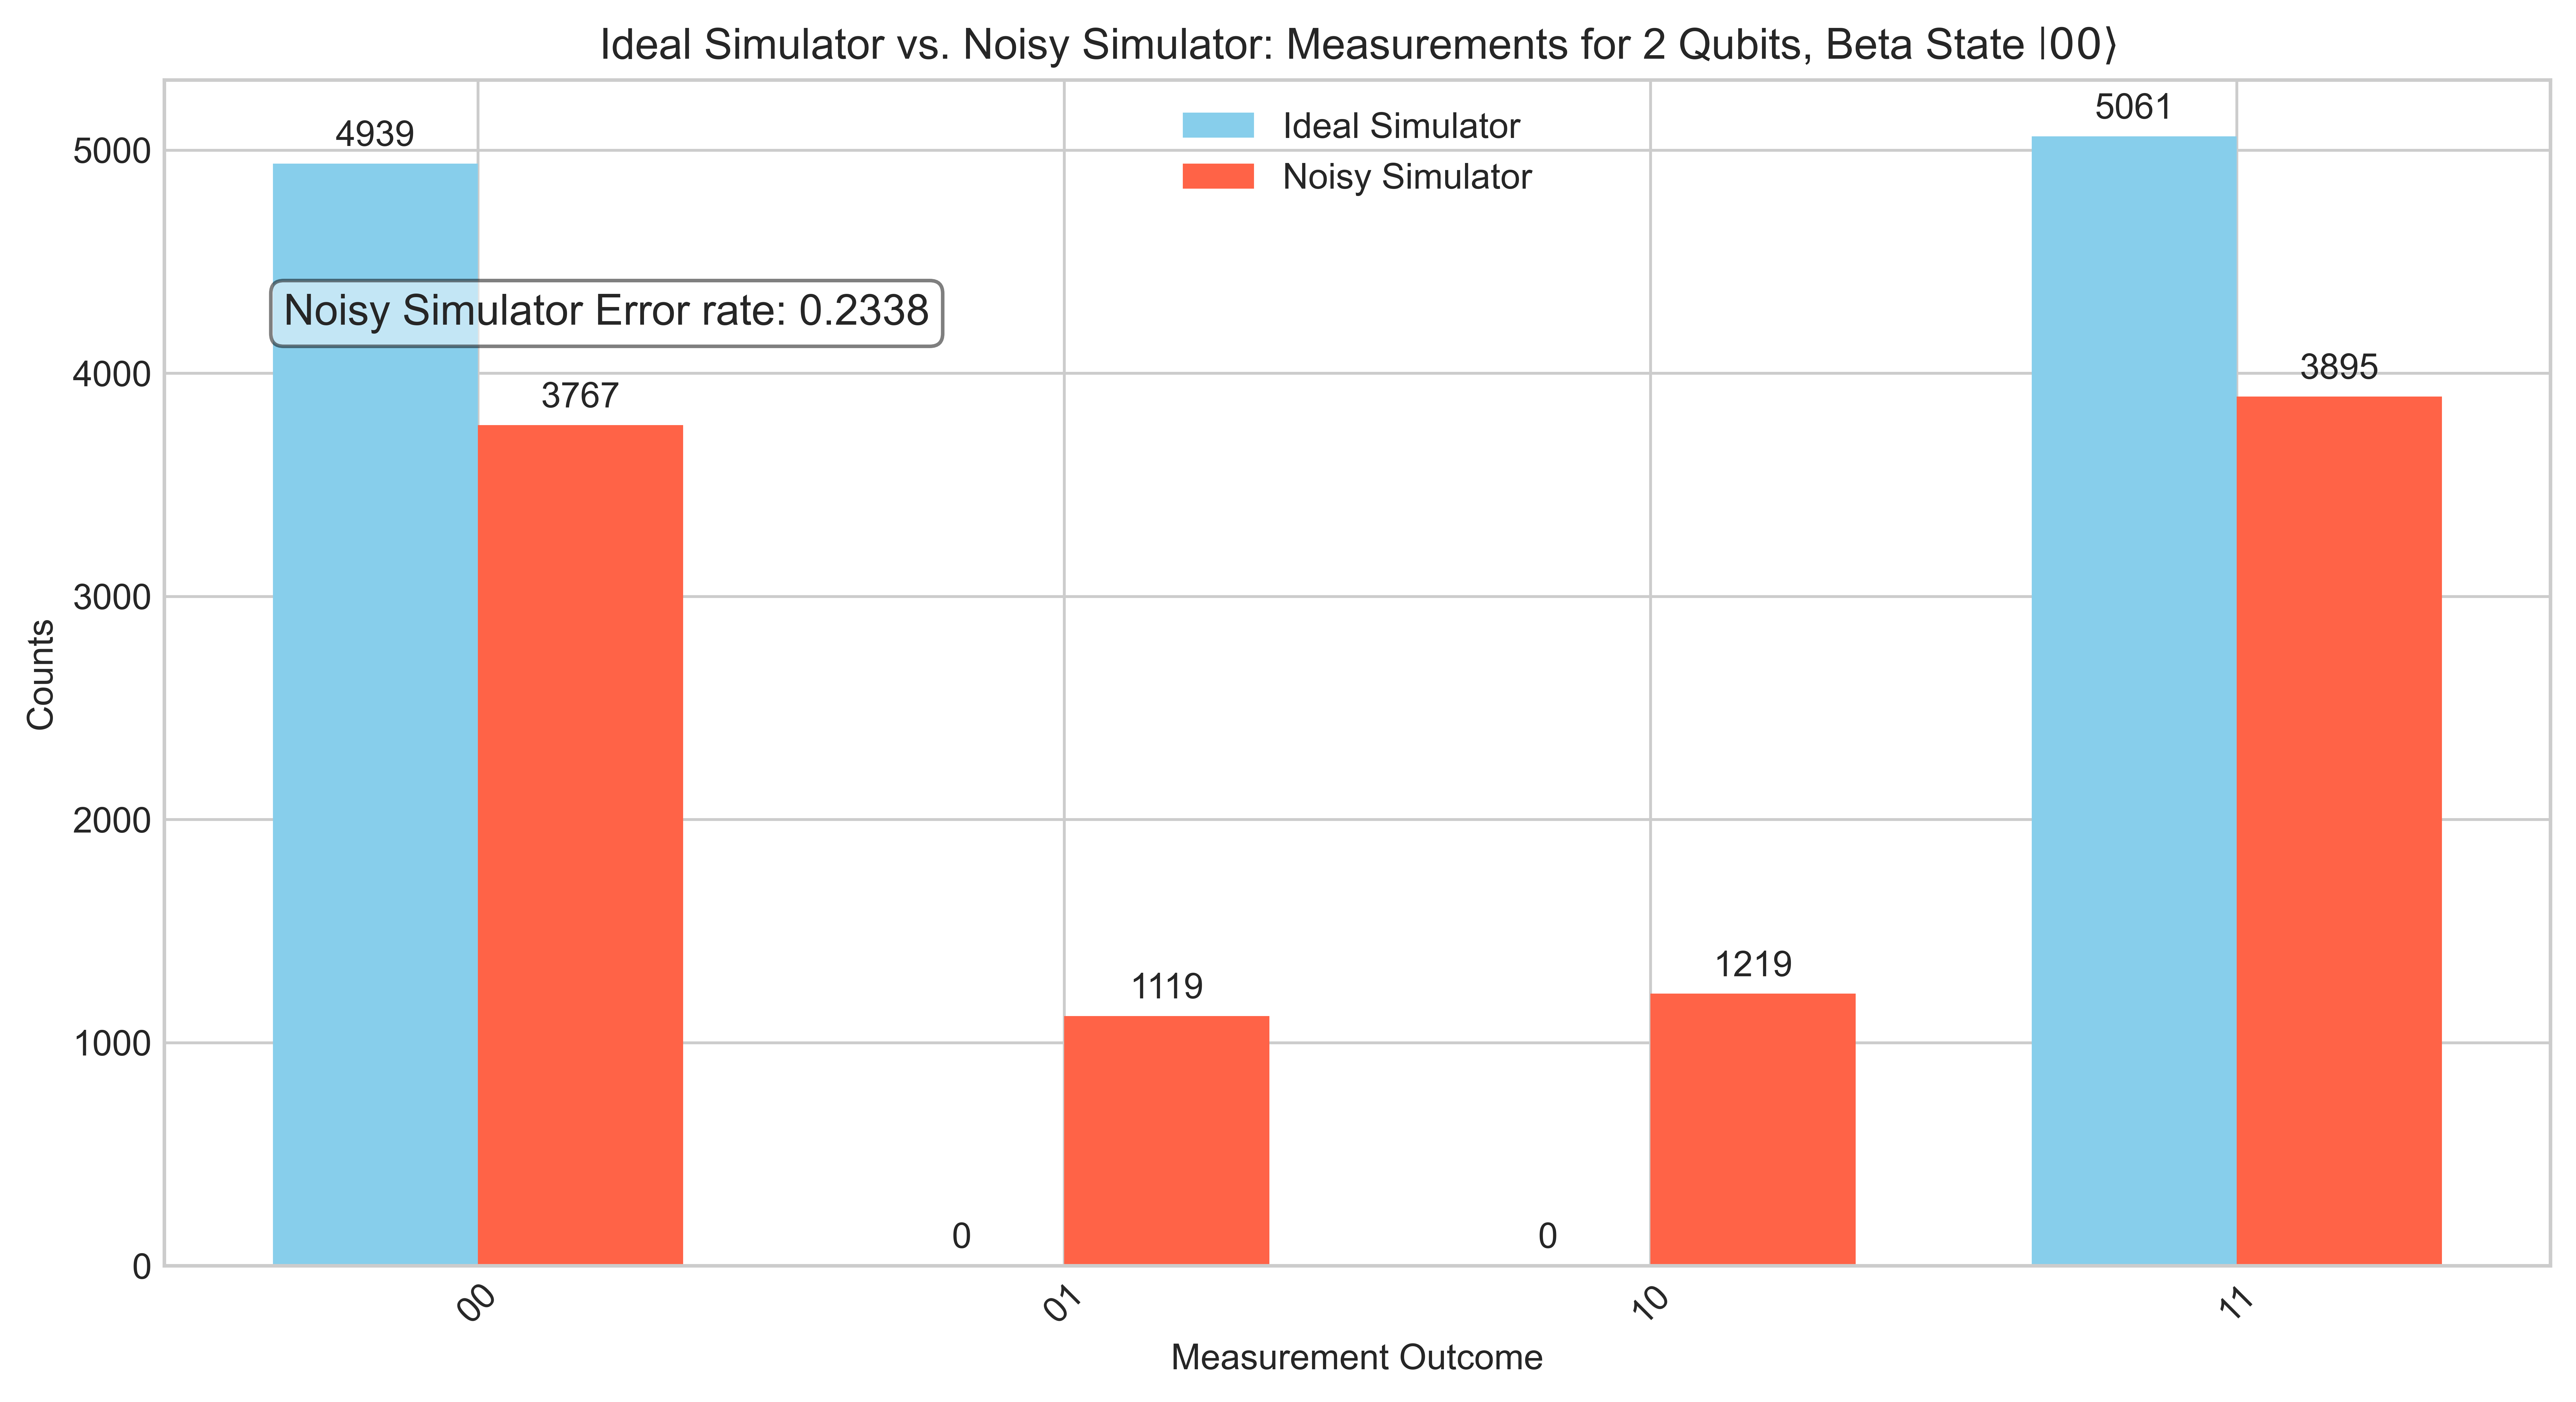

In [71]:
Fig = simulator_computer_comparison(
    bell_sim_labels,
    bell_sim_counts,
    bell_noise_labels,
    bell_noise_counts,
    '2', '00',
    error_rate_sim=bell_noise_error_rate,
    save_fig=True,
    figname='figures/ideal-vs-noise.png'
    )